/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/coins.png


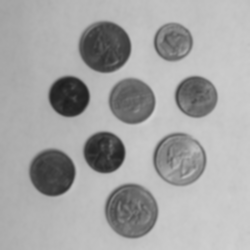

(250, 250)

In [4]:
# USAGE
# python blurring.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/coins.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

# Load the image, convert it to grayscale, and blur it slightly
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(blurred))

image.shape


Otsu's threshold: 137


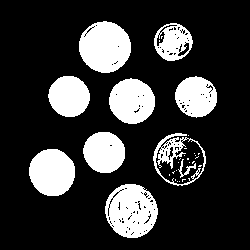

In [5]:
# OpenCV provides methods to use Otsu's thresholding, but I find
# the mahotas implementation is more 'Pythonic'. Otsu's method
# assumes that are two 'peaks' in the grayscale histogram. It finds
# these peaks, and then returns a value we should threshold on.
T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))

# Applying the threshold can be done using NumPy, where values
# smaller than the threshold are set to zero, and values above
# the threshold are set to 255 (white).
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(thresh))

Riddler-Calvard: 137.80118246864677


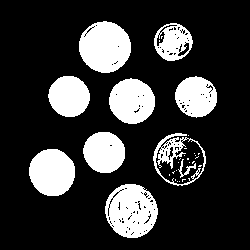

In [6]:
# An alternative is to use the Riddler-Calvard method
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
display(Image.fromarray(thresh))